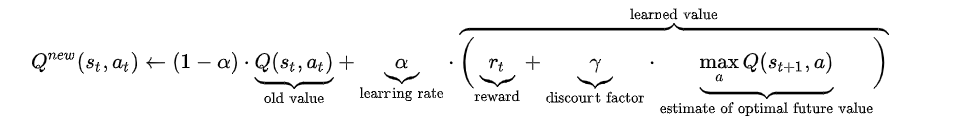

In [10]:
#On OS X, you can install ffmpeg via `brew install ffmpeg'
import gym # gym is for playing with reinforcement stuff
from gym import wrappers
from gym import envs
import numpy as np
import io
import base64
from IPython.display import HTML
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True 

In [11]:
## helpers
def showRender():
    video = io.open('./gym-results/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
    encoded = base64.b64encode(video)
    return HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))

def get_discrete_state(state):
    discrete_state=(state-env.observation_space.low)/discrete_win_size
    return tuple(discrete_state.astype(np.int))

In [16]:
env=gym.make('MountainCar-v0') # three actions in this env: 0-go left, 1-do nothing, 2-push right
env=wrappers.Monitor(env, "./gym-results", force=True)
temp_states=[]
discrete_os_size=[20] * len(env.observation_space.high) #seperating it into 20 chunks
discrete_win_size=(env.observation_space.high-env.observation_space.low)/discrete_os_size


##setting param
learning_rate=0.1
discount=0.95 # how important is future actions?
train_size=2500
show_every=100

## implementation
q_table=np.random.uniform(low=-2,high=0,size=discrete_os_size+[env.action_space.n]) #init the Q-table
Q_log=[]
for episode in range(train_size):
    done=False
    discrete_state=get_discrete_state(env.reset())
    while not done:
        action=np.argmax(q_table[discrete_state]) # always exploit?
        new_state,reward,done,info=env.step(action)
        # states is a venctor of position and velocity; reward is a float; done is a flag
        new_discrete_state=get_discrete_state(new_state)
        if not done:
            max_future_q=np.max(q_table[new_discrete_state]) 
            # this compute the based on the biggest Q regardless of which action
            current_q=q_table[discrete_state+(action,)]
            new_q=(1-learning_rate)*current_q+learning_rate*(reward+discount*max_future_q)
            q_table[discrete_state+(action,)]=new_q
            Q_log.append(q_table[discrete_state])
        elif new_state[0]>=env.goal_position:
            q_table[discrete_state+(action,)]=0 # rewarding
        elif done:
            print("Done after {} training".format(episode))
        discrete_state=new_discrete_state
        temp_states.append(new_discrete_state)
    if episode%show_every==0:
        print(discrete_state,episode,reward,action)
    states=np.array(temp_states)
env.close()

Done after 0 training
(7, 9) 0 -1.0 1
Done after 1 training
Done after 2 training
Done after 3 training
Done after 4 training
Done after 5 training
Done after 6 training
Done after 7 training
Done after 8 training
Done after 9 training
Done after 10 training
Done after 11 training
Done after 12 training
Done after 13 training
Done after 14 training
Done after 15 training
Done after 16 training
Done after 17 training
Done after 18 training
Done after 19 training
Done after 20 training
Done after 21 training
Done after 22 training
Done after 23 training
Done after 24 training
Done after 25 training
Done after 26 training
Done after 27 training
Done after 28 training
Done after 29 training
Done after 30 training
Done after 31 training
Done after 32 training
Done after 33 training
Done after 34 training
Done after 35 training
Done after 36 training
Done after 37 training
Done after 38 training
Done after 39 training
Done after 40 training
Done after 41 training
Done after 42 training
Done 

Done after 343 training
Done after 344 training
Done after 345 training
Done after 346 training
Done after 347 training
Done after 348 training
Done after 349 training
Done after 350 training
Done after 351 training
Done after 352 training
Done after 353 training
Done after 354 training
Done after 355 training
Done after 356 training
Done after 357 training
Done after 358 training
Done after 359 training
Done after 360 training
Done after 361 training
Done after 362 training
Done after 363 training
Done after 364 training
Done after 365 training
Done after 366 training
Done after 367 training
Done after 368 training
Done after 369 training
Done after 370 training
Done after 371 training
Done after 372 training
Done after 373 training
Done after 374 training
Done after 375 training
Done after 376 training
Done after 377 training
Done after 378 training
Done after 379 training
Done after 380 training
Done after 381 training
Done after 382 training
Done after 383 training
Done after 384 t

Done after 705 training
Done after 706 training
Done after 707 training
Done after 708 training
Done after 709 training
Done after 710 training
Done after 711 training
Done after 712 training
Done after 713 training
Done after 714 training
Done after 715 training
Done after 716 training
Done after 717 training
Done after 719 training
Done after 720 training
Done after 721 training
Done after 722 training
Done after 723 training
Done after 724 training
Done after 725 training
Done after 727 training
Done after 728 training
Done after 730 training
Done after 731 training
Done after 732 training
Done after 733 training
Done after 734 training
Done after 737 training
Done after 738 training
Done after 739 training
Done after 740 training
Done after 741 training
Done after 742 training
Done after 743 training
Done after 744 training
Done after 745 training
Done after 746 training
Done after 747 training
Done after 748 training
Done after 749 training
Done after 750 training
Done after 751 t

Done after 1113 training
Done after 1114 training
Done after 1115 training
Done after 1116 training
Done after 1117 training
Done after 1118 training
Done after 1119 training
Done after 1120 training
Done after 1121 training
Done after 1122 training
Done after 1123 training
Done after 1124 training
Done after 1125 training
Done after 1126 training
Done after 1127 training
Done after 1128 training
Done after 1129 training
Done after 1130 training
Done after 1131 training
Done after 1133 training
Done after 1134 training
Done after 1135 training
Done after 1136 training
Done after 1138 training
Done after 1139 training
Done after 1140 training
Done after 1141 training
Done after 1142 training
Done after 1143 training
Done after 1144 training
Done after 1145 training
Done after 1146 training
Done after 1147 training
Done after 1148 training
Done after 1150 training
Done after 1151 training
Done after 1152 training
Done after 1153 training
Done after 1154 training
Done after 1155 training


Done after 1661 training
Done after 1662 training
Done after 1663 training
Done after 1666 training
Done after 1667 training
Done after 1680 training
Done after 1682 training
Done after 1687 training
Done after 1697 training
(19, 13) 1700 -1.0 2
Done after 1709 training
Done after 1712 training
Done after 1713 training
Done after 1715 training
Done after 1716 training
Done after 1729 training
Done after 1734 training
Done after 1741 training
Done after 1742 training
Done after 1743 training
Done after 1746 training
Done after 1751 training
Done after 1762 training
Done after 1767 training
(19, 13) 1800 -1.0 2
Done after 1832 training
Done after 1837 training
Done after 1863 training
Done after 1879 training
Done after 1881 training
Done after 1885 training
Done after 1889 training
(19, 12) 1900 -1.0 2
Done after 1935 training
Done after 1937 training
Done after 1997 training
Done after 1998 training
Done after 1999 training
Done after 2000 training
(3, 1) 2000 -1.0 0
Done after 2003 tr

In [4]:
showRender()

In [111]:
q_table=np.random.uniform(low=-2,high=0,size=discrete_os_size+[env.action_space.n])
get_discrete_state(env.reset())
test_q=q_table[get_discrete_state(env.reset())]


[-1.44991664 -1.41888251 -0.61828475]


2

In [ ]:
def dumbHcode(action,new_state):
    #new_state is [position,V]
    if new_state[1]

In [14]:
help(env.render)

Help on method render in module gym.core:

render(mode='human', **kwargs) method of gym.wrappers.monitor.Monitor instance
    Renders the environment.
    
    The set of supported modes varies per environment. (And some
    environments do not support rendering at all.) By convention,
    if mode is:
    
    - human: render to the current display or terminal and
      return nothing. Usually for human consumption.
    - rgb_array: Return an numpy.ndarray with shape (x, y, 3),
      representing RGB values for an x-by-y pixel image, suitable
      for turning into a video.
    - ansi: Return a string (str) or StringIO.StringIO containing a
      terminal-style text representation. The text can include newlines
      and ANSI escape sequences (e.g. for colors).
    
    Note:
        Make sure that your class's metadata 'render.modes' key includes
          the list of supported modes. It's recommended to call super()
          in implementations to use the functionality of this method

In [17]:
Q_log

[array([-19.74185641, -19.76523729, -19.76518043]),
 array([-19.740733  , -19.73958749, -19.73932658]),
 array([-19.74185641, -19.76523729, -19.76518043]),
 array([-19.740733  , -19.73958749, -19.73932658]),
 array([-19.740733  , -19.73958749, -19.73932658]),
 array([-19.74185641, -19.76523729, -19.76518043]),
 array([-19.74185641, -19.76523729, -19.76518043]),
 array([-19.740733  , -19.73958749, -19.73932658]),
 array([-19.740733  , -19.73958749, -19.73932658]),
 array([-19.740733  , -19.73958749, -19.73932658]),
 array([-19.740733  , -19.73958749, -19.73932658]),
 array([-19.74185641, -19.76523729, -19.76518043]),
 array([-19.74185641, -19.76523729, -19.76518043]),
 array([-19.74185641, -19.76523729, -19.76518043]),
 array([-19.740733  , -19.73958749, -19.73932658]),
 array([-19.740733  , -19.73958749, -19.73932658]),
 array([-19.740733  , -19.73958749, -19.73932658]),
 array([-19.74185641, -19.76523729, -19.76518043]),
 array([-19.74185641, -19.76523729, -19.76518043]),
 array([-19.